# Описание задачи

В данном ноутбуке решается задача прогнорзирования цены аренды квартиры. Данные собраны с российских сайтов недвижимости за февраль 2020 года. Содержат около 100 000 строк из Москвы, Казани, Чебоксар и Йошкар-Олы.

Целевая переменная это `price`, в которой хранится значение по аренде.

Из других данных у нас есть:
- Кол-во комнат
- Наличие разлиных комнат (гостинная, кухня)
- Наличие газа/воды
- Площадь
- Год постройки
- Материал, из которого постоен дом
- и др.

# EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sale-and-rental-of-russian-real-estate-in-4-cities/rent_apartments.csv
/kaggle/input/sale-and-rental-of-russian-real-estate-in-4-cities/selling_apartments.csv


In [2]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder


Первым делом проанализируем наши данные на типы значений в клонках, пропущенные значения и сделаем выыводы о снижении размерности и преобразовании кат. признаков. 

In [37]:
df = pd.read_csv('/kaggle/input/sale-and-rental-of-russian-real-estate-in-4-cities/rent_apartments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   object_type          12107 non-null  int64  
 1   type                 12107 non-null  object 
 2   rooms                12107 non-null  int64  
 3   level                12107 non-null  object 
 4   kitchen_area         8595 non-null   float64
 5   living_area          8052 non-null   float64
 6   area                 12107 non-null  float64
 7   price_by_meter       12107 non-null  float64
 8   price                12107 non-null  float64
 9   material             12072 non-null  object 
 10  published            12107 non-null  object 
 11  updated              12107 non-null  object 
 12  build_year           12107 non-null  int64  
 13  build_serias         12107 non-null  object 
 14  build_type           12107 non-null  int64  
 15  max_levels           12107 non-null 

In [28]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
object_type,12107.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
type,12107,5,Многоквартирный дом,8205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,12107.0,NaN,NaN,NaN,1.988436,1.15438,0.0,1.0,2.0,3.0,10.0
level,12107,1090,3/5,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_area,8595.0,NaN,NaN,NaN,11.262664,6.321673,2.0,8.0,10.0,12.3,100.0
living_area,8052.0,NaN,NaN,NaN,41.594858,36.02879,5.0,20.0,31.0,47.0,640.0
area,12107.0,NaN,NaN,NaN,72.165995,84.970118,10.0,40.0,54.0,80.0,5000.0
price_by_meter,12107.0,NaN,NaN,NaN,1598.491038,11816.957465,6.0,750.0,1143.0,1918.5,966667.0
price,12107.0,NaN,NaN,NaN,130069.312216,521848.963051,6000.0,35000.0,55000.0,135000.0,45000000.0
material,12072,5,Кирпич,4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

col_null_count = []
for col in cols_with_missing:
    null_count = df[col].isnull().sum()
    col_null_count.append([
        col, 
        null_count,
        round(null_count / len(df[col]), 2),
        df[col].dtype
    ])

col_null_count.sort(key=lambda x: x[1])
    
print(tabulate(col_null_count, headers=['Col', 'Null Count', 'Null %', 'Type']))

Col             Null Count    Null %  Type
------------  ------------  --------  -------
material                35      0     object
kitchen_area          3512      0.29  float64
living_area           4055      0.33  float64


In [30]:
def print_col_info(df):
    uniq_col_count = []
    for col in df:
        uniq_count = df[col].unique()
        types = set([type(x) for x in uniq_count])
        uniq_col_count.append([col, len(uniq_count), uniq_count[:10], types])

    uniq_col_count.sort(key=lambda x: x[1])

    print(tabulate(uniq_col_count, headers=['Col', 'Uniq_num', 'Values (top 10)', 'Types']))
    
print_col_info(df)

Col                    Uniq_num  Values (top 10)                                                           Types
-------------------  ----------  ------------------------------------------------------------------------  --------------------------------
object_type                   1  [0]                                                                       {<class 'numpy.int64'>}
build_type                    1  [0]                                                                       {<class 'numpy.int64'>}
rubbish_chute                 3  ['0' 'Нет' 'Есть']                                                        {<class 'str'>}
gas                           3  ['0' 'Да' 'Нет']                                                          {<class 'str'>}
build_oldest                  3  ['new' 'old' 'middle']                                                    {<class 'str'>}
build_overlap                 4  ['0' 'Железобетонные' 'Деревянные' 'Смешанные']                           {<class '

На основе полученной информации можно сделать следующие шаги:
- удалить признаки `object_type` и `build_type`, тк они имеют только одно уникальное значение.
- Заменить '0' на пустое значение.
- Преобразовать `published` и `updated` в тип datetime
- Заменить в категориальных признаках значения, которые очень редко встречаются, значением "Другое". Это для снижения размерности после OneHot.
- Применить OneHotEncoding к категориальным признакам.
- Стандартизировать признаки

In [38]:
cols_for_dep = ['level', 'agencyName']
for col in cols_for_dep:
    cols_count = df[col].value_counts()
    cols = cols_count[cols_count < cols_count.mean()].index
    df.loc[df[col].isin(cols), col] = 'Другое'

In [39]:
df = df.replace(['0'], np.nan)

In [6]:
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

col_null_count = []
for col in cols_with_missing:
    null_count = df[col].isnull().sum()
    col_null_count.append([
        col, 
        null_count,
        round(null_count / len(df[col]), 2),
        df[col].dtype
    ])

col_null_count.sort(key=lambda x: x[1])

print(tabulate(col_null_count, headers=['Col', 'Null Count', 'Null %', 'Type']))

Col              Null Count    Null %  Type
-------------  ------------  --------  -------
material                 35      0     object
kitchen_area           3512      0.29  float64
build_serias           4048      0.33  object
living_area            4055      0.33  float64
gas                    4168      0.34  object
build_overlap          4229      0.35  object
heating                4312      0.36  object
build_walls            4644      0.38  object
rubbish_chute          4662      0.39  object


Заполним пропущенные значения средним, если это числовой признак, и наиболее встречающимся, если это категориальный признак.

In [40]:
df['material'] = df['material'].fillna(df['material'].value_counts().index[0])
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mean())
df['living_area'] = df['living_area'].fillna(df['living_area'].mean())
df['build_serias'] = df['build_serias'].fillna(df['build_serias'].value_counts().index[0])
df['gas'] = df['gas'].fillna(df['gas'].value_counts().index[0])
df['build_overlap'] = df['build_overlap'].fillna(df['build_overlap'].value_counts().index[0])
df['heating'] = df['heating'].fillna(df['heating'].value_counts().index[0])
df['build_walls'] = df['build_walls'].fillna(df['build_walls'].value_counts().index[0])
df['rubbish_chute'] = df['rubbish_chute'].fillna(df['rubbish_chute'].value_counts().index[0])

In [41]:
df = df.drop(columns=['object_type', 'build_type'])
df['updated'] = pd.to_datetime(df['updated'], dayfirst=True)
df['published'] = pd.to_datetime(df['published'], dayfirst=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 12107 non-null  object        
 1   rooms                12107 non-null  int64         
 2   level                12107 non-null  object        
 3   kitchen_area         12107 non-null  float64       
 4   living_area          12107 non-null  float64       
 5   area                 12107 non-null  float64       
 6   price_by_meter       12107 non-null  float64       
 7   price                12107 non-null  float64       
 8   material             12107 non-null  object        
 9   published            12107 non-null  datetime64[ns]
 10  updated              12107 non-null  datetime64[ns]
 11  build_year           12107 non-null  int64         
 12  build_serias         12107 non-null  object        
 13  max_levels           12107 non-

In [42]:
obj_columns = [col for col in df.columns if df[col].dtype == np.dtype('O')]

oe_list = {}
for col in obj_columns:
    en = OneHotEncoder(sparse_output=False)
    transformed = en.fit_transform(df[col].to_numpy().reshape(-1, 1))
    ohe_df = pd.DataFrame(transformed, columns=en.get_feature_names_out(), index=df.index)
    df = pd.concat([df, ohe_df], axis=1).drop([col], axis=1)
    oe_list[col] = en

In [43]:
df['published'] = df['published'].astype(int)/ 10**9
df['updated'] = df['updated'].astype(int)/ 10**9

In [46]:
sc_list = {}
for col in df.columns:
    sc = StandardScaler()
    df[col] = sc.fit_transform(df[[col]])
    sc_list[col] = sc

# Выбор молели

Разделим выборку на тренировочную и тестовую.

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (9685, 1005)
Test shape: (2422, 1005)


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Рассмотрим 2 алгоритма: 
- KNeighborsRegressor
- RandomForestRegressor

В каждом переберем параметры с помощью GridSearchCV с целью поиска наилучших.

In [144]:
parameters = {'n_neighbors': list(range(3, 11))}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, verbose=2, cv=4)
clf.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END ......................................n_neighbors=3; total time=   1.1s
[CV] END ......................................n_neighbors=3; total time=   1.3s
[CV] END ......................................n_neighbors=3; total time=   0.9s
[CV] END ......................................n_neighbors=3; total time=   0.9s
[CV] END ......................................n_neighbors=4; total time=   0.9s
[CV] END ......................................n_neighbors=4; total time=   0.9s
[CV] END ......................................n_neighbors=4; total time=   0.9s
[CV] END ......................................n_neighbors=4; total time=   0.9s
[CV] END ......................................n_neighbors=5; total time=   0.9s
[CV] END ......................................n_neighbors=5; total time=   0.9s
[CV] END ......................................n_neighbors=5; total time=   0.9s
[CV] END ......................................n_

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]}, verbose=2)

In [145]:
y_pred = clf.predict(X_test)
regression_report(y_test, y_pred)

Metrics for regression:
      mean absolute error:                0.111
    median absolute error:                0.039
       mean squared error:                0.073
                max error:                4.619
                 r2 score:                0.430
 explained variance score:                0.430

Percentiles:
                        5:               -0.261
                       25:               -0.048
                       50:               -0.006
                       75:                0.030
                       95:                0.278


In [146]:
parameters = {'n_estimators': list(range(100, 401, 100)), 'max_depth': [4, 8], 'random_state': [42]}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, parameters, verbose=2, cv=4)
clf.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END .....max_depth=4, n_estimators=100, random_state=42; total time=   8.7s
[CV] END .....max_depth=4, n_estimators=100, random_state=42; total time=   8.8s
[CV] END .....max_depth=4, n_estimators=100, random_state=42; total time=   8.7s
[CV] END .....max_depth=4, n_estimators=100, random_state=42; total time=   8.7s
[CV] END .....max_depth=4, n_estimators=200, random_state=42; total time=  17.2s
[CV] END .....max_depth=4, n_estimators=200, random_state=42; total time=  17.2s
[CV] END .....max_depth=4, n_estimators=200, random_state=42; total time=  17.3s
[CV] END .....max_depth=4, n_estimators=200, random_state=42; total time=  17.1s
[CV] END .....max_depth=4, n_estimators=300, random_state=42; total time=  25.6s
[CV] END .....max_depth=4, n_estimators=300, random_state=42; total time=  25.8s
[CV] END .....max_depth=4, n_estimators=300, random_state=42; total time=  25.8s
[CV] END .....max_depth=4, n_estimators=300, rand

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [42]},
             verbose=2)

In [147]:
clf.best_params_

{'max_depth': 8, 'n_estimators': 200, 'random_state': 42}

In [148]:
y_pred = clf.predict(X_test)
regression_report(y_test, y_pred)

Metrics for regression:
      mean absolute error:                0.012
    median absolute error:                0.006
       mean squared error:                0.002
                max error:                0.956
                 r2 score:                0.987
 explained variance score:                0.987

Percentiles:
                        5:               -0.021
                       25:               -0.006
                       50:               -0.001
                       75:                0.005
                       95:                0.020


# Best Model

По результатам лучше всего себя показала модель RandomForestRegressor.

In [50]:
rfr = RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

In [51]:
y_pred = rfr.predict(X_test)

In [21]:
X_test

,rooms,kitchen_area,living_area,area,price_by_meter,published,updated,build_year,max_levels,min_levels,...,x0_наталья,x0_собственник,x0_частное лицо,x0_Йошкар-Ола,x0_Казань,x0_Москва,x0_Чебоксары,x0_middle,x0_new,x0_old
1483,-0.856284,1.640467e+00,-9.051934e-01,-0.355034,0.015868,0.472181,0.434866,-1.451327,-0.013066,-0.884684,...,-0.025714,-0.025714,-0.040678,-0.12593,-0.540720,0.582214,-0.106983,-0.474638,1.107416,-0.761396
8300,0.010018,3.335176e-16,2.418432e-16,-0.296187,0.012399,0.423071,-2.241078,-1.451327,-0.013066,-0.884684,...,-0.025714,-0.025714,-0.040678,-0.12593,-0.540720,0.582214,-0.106983,-0.474638,1.107416,-0.761396
8382,0.876319,-9.880848e-01,5.803689e-02,-0.159663,-0.041424,0.398516,-3.579049,0.674458,-0.009034,0.346372,...,-0.025714,-0.025714,-0.040678,-0.12593,-0.540720,0.582214,-0.106983,-0.474638,-0.903003,1.313378
7709,-0.856284,-2.370699e-01,-3.946473e-01,-0.378572,0.097449,0.407724,-3.077310,-1.451327,-0.013066,-0.884684,...,-0.025714,-0.025714,-0.040678,-0.12593,-0.540720,0.582214,-0.106983,-0.474638,1.107416,-0.761396
3139,0.010018,5.139450e-01,2.418432e-16,-0.213802,-0.041255,0.337129,0.434866,0.711109,-0.001866,2.534915,...,-0.025714,-0.025714,-0.040678,-0.12593,-0.540720,0.582214,-0.106983,2.106871,-0.903003,-0.761396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,1.742620,7.016987e-01,3.281284e+00,2.681453,0.005798,0.211284,0.602112,0.707875,-0.010826,-0.747900,...,-0.025714,-0.025714,-0.040678,-0.12593,-0.540720,0.582214,-0.106983,2.106871,-0.903003,-0.761396
1458,-0.856284,-9.880848e-01,-7.350113e-01,-0.437419,-0.038547,0.275741,0.602112,0.664756,-0.009034,-0.747900,...,-0.025714,-0.025714,-0.040678,-0.12593,-0.540720,0.582214,-0.106983,-0.474638,-0.903003,1.313378
11667,-0.856284,-6.125774e-01,-7.350113e-01,-0.319726,-0.112681,0.398516,0.602112,-1.451327,-0.013066,-0.884684,...,-0.025714,-0.025714,-0.040678,-0.12593,1.849385,-1.717580,-0.106983,-0.474638,1.107416,-0.761396
1835,0.010018,-2.370699e-01,-3.265745e-01,-0.190263,-0.052172,-6.722438,0.267619,0.707875,-0.006794,-0.884684,...,-0.025714,-0.025714,-0.040678,-0.12593,-0.540720,0.582214,-0.106983,2.106871,-0.903003,-0.761396


In [57]:
y_test_sc = sc_list['price'].inverse_transform(y_test.values.reshape(-1, 1))
y_pred_sc = sc_list['price'].inverse_transform(y_pred.reshape(-1, 1))

In [64]:
df_res = pd.DataFrame({'pred': y_pred_sc.reshape(1, -1)[0], 'true': y_test_sc.reshape(1, -1)[0]})
df_res

,pred,true
0,71516.343433,75000.0
1,77195.681320,82000.0
2,59737.639699,65000.0
3,111899.727142,110000.0
4,57728.233804,60000.0
...,...,...
2417,456835.155296,500000.0
2418,40849.063500,39999.0
2419,14696.204779,12000.0
2420,54721.682471,55000.0


Построим график, чтобы сравнить результаты.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pred', ylabel='true'>

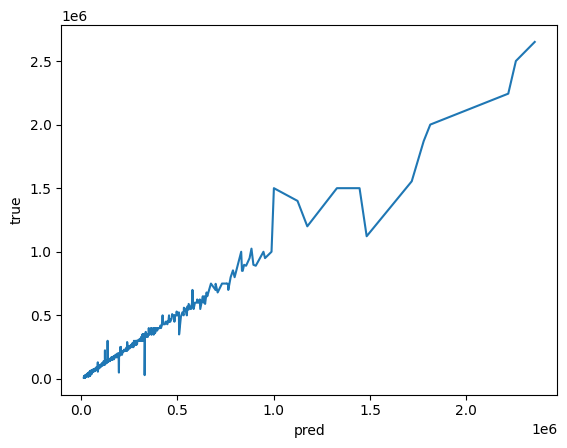

In [67]:
sns.lineplot(df_res, x='pred', y='true')

В итоге мы получили, что наш алгоритм хорошо справляется в предсказании цен на квартиры, у которых стоимость аренды до 100000 рублей. Свыше данных очень мало, поэтому модель не научилась их предсказывать.